In [20]:
pip install pandas matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_excel('myexcel.xlsx')
print(df)

              Name            Team  Number Position  Age               Height  \
0    Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1      Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2     John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3      R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4    Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   
..             ...             ...     ...      ...  ...                  ...   
453   Shelvin Mack       Utah Jazz       8       PG   26  2023-03-06 00:00:00   
454      Raul Neto       Utah Jazz      25       PG   24  2023-01-06 00:00:00   
455   Tibor Pleiss       Utah Jazz      21        C   26  2023-03-07 00:00:00   
456    Jeff Withey       Utah Jazz      24        C   26                  7-0   
457       Priyanka       Utah Jazz      34        C   25  2023-03-07 00:00:00   

     Weight            Coll

In [26]:
np.random.seed(0)  
df['Height'] = np.random.randint(150, 181, size=len(df))  
print(df)

              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25     162     180   
1      Jae Crowder  Boston Celtics      99       SF   25     165     235   
2     John Holland  Boston Celtics      30       SG   27     171     205   
3      R.J. Hunter  Boston Celtics      28       SG   22     150     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29     153     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26     176     203   
454      Raul Neto       Utah Jazz      25       PG   24     169     179   
455   Tibor Pleiss       Utah Jazz      21        C   26     157     256   
456    Jeff Withey       Utah Jazz      24        C   26     158     231   
457       Priyanka       Utah Jazz      34        C   25     179     231   

               College     Salary  
0                Texas  7730337.0  
1            Ma

In [38]:
# 1. Distribution of employees across each team and percentage split
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100

In [28]:
# Display the distribution and percentage
print("Team Distribution:\n", team_distribution)
print("\nTeam Percentage:\n", team_percentage)


Team Distribution:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Team Percentage:
 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies   

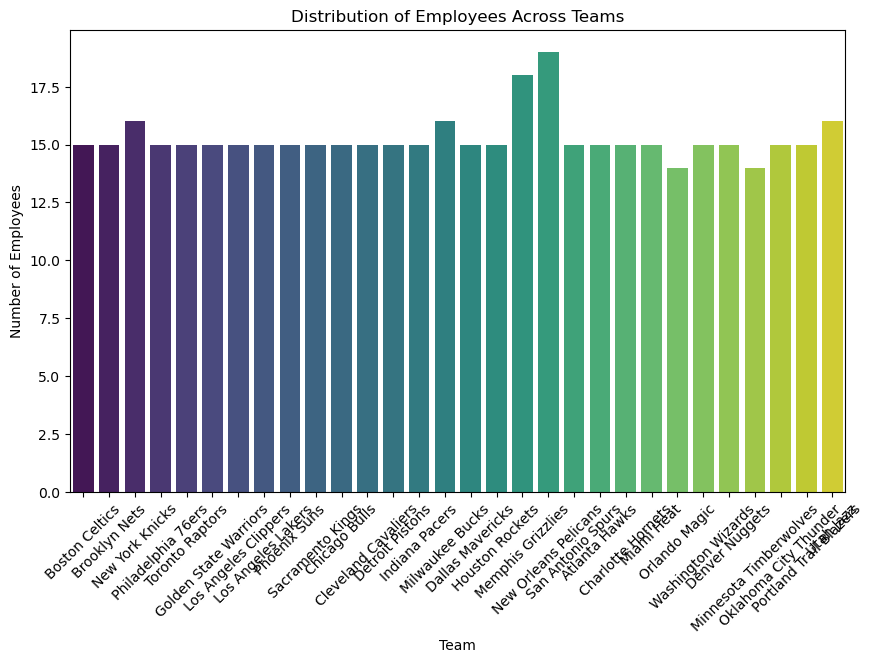

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Team', palette='viridis')
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

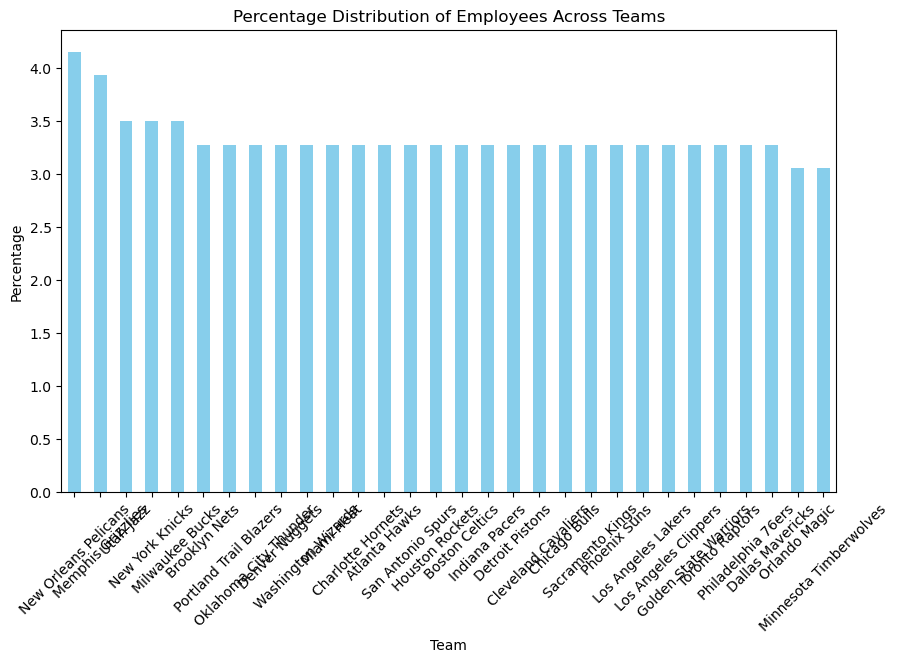

In [40]:
team_percentage.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Percentage Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [29]:
# 2. Segregate employees based on their positions
position_group = df.groupby('Position').size()

In [30]:
# Display the position groups
print("\nPosition Group:\n", position_group)


Position Group:
 Position
C      79
PF    100
PG     92
SF     85
SG    102
dtype: int64


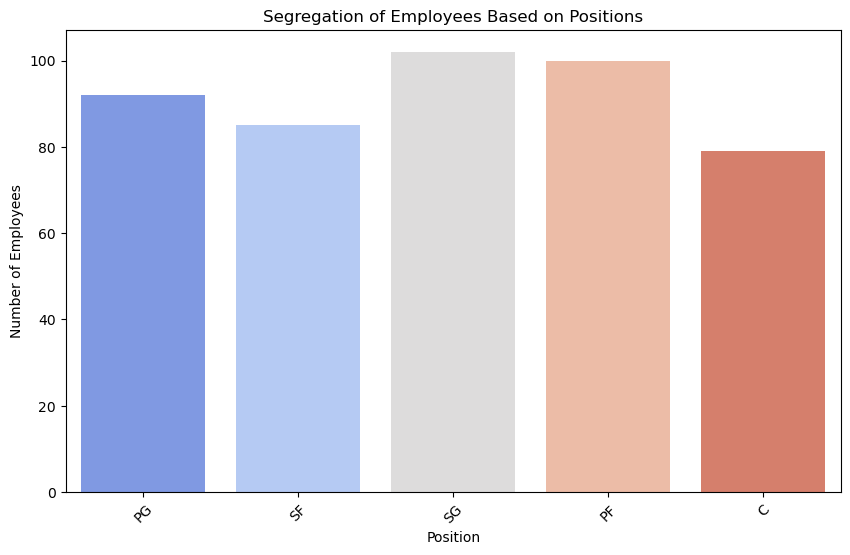

In [41]:
# 2. Segregate employees based on their positions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Position', palette='coolwarm')
plt.title('Segregation of Employees Based on Positions')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

In [32]:
# 3. Identify the predominant age group among employees
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [33]:
# Find the predominant age group
age_group_count = df['Age_Group'].value_counts()
predominant_age_group = age_group_count.idxmax()
print("\nPredominant Age Group: ", predominant_age_group)


Predominant Age Group:  20-30


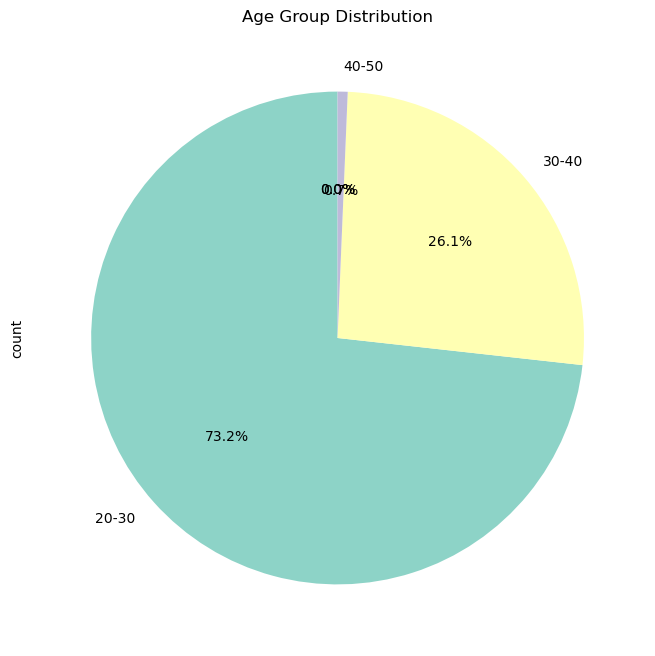

In [44]:
# 3. Identify the predominant age group
age_group_count.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=sns.color_palette('Set3'))
plt.title('Age Group Distribution')
plt.show()

In [34]:
# 4. Discover which team and position have the highest salary expenditure
salary_team_position = df.groupby(['Team', 'Position'])['Salary'].sum()
highest_salary_team_position = salary_team_position.idxmax()
print("\nHighest Salary Expenditure Team and Position: ", highest_salary_team_position)



Highest Salary Expenditure Team and Position:  ('Los Angeles Lakers', 'SF')


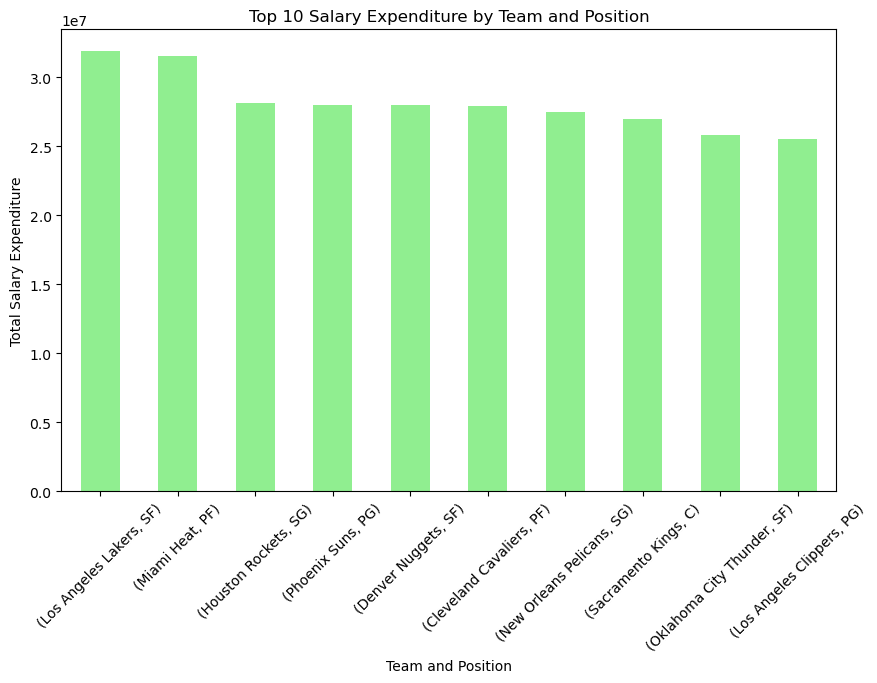

In [43]:
# 4. Discover which team and position have the highest salary expenditure
salary_team_position = df.groupby(['Team', 'Position'])['Salary'].sum().sort_values(ascending=False)
salary_team_position[:10].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Top 10 Salary Expenditure by Team and Position')
plt.xlabel('Team and Position')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45)
plt.show()

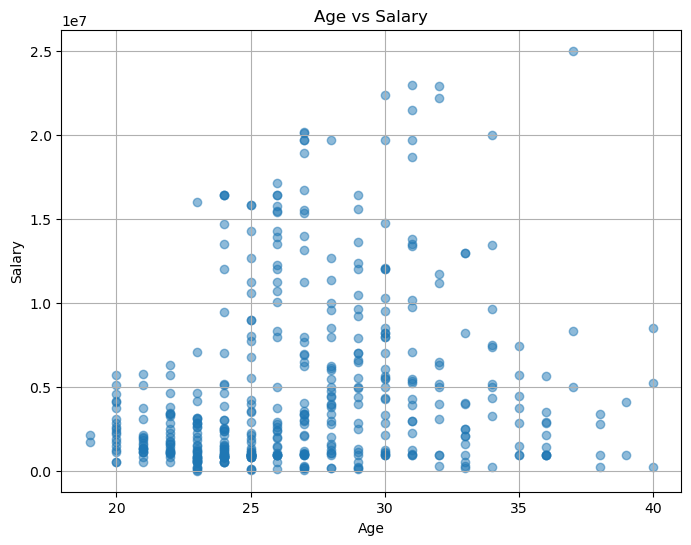

In [35]:
# 5. Investigate correlation between age and salary and plot it
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Salary'], alpha=0.5)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [36]:
# Calculate the correlation
correlation = df['Age'].corr(df['Salary'])
print("\nCorrelation between Age and Salary: ", correlation)


Correlation between Age and Salary:  0.21400941226570974
